In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Load Partial Model

In [4]:
from prophet.serialize import model_to_json, model_from_json

with open('model_tuning_log_mul_ds_ws.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

Importing plotly failed. Interactive plots will not work.


## Load processed Future Data

In [5]:
future_df = pd.read_csv('processed_future_data.csv')

In [6]:
future_df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
future_df

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [8]:
future_df.rename(columns={'Date':'ds'}, inplace=True)

In [9]:
future_df

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [13]:
future_df['cap'] = 12500

In [14]:
future_df['floor'] = 800

## Make predictions on Future Data

In [15]:
predictions = saved_mv_model.predict(future_df)

In [16]:
predictions

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,cloudcover,cloudcover_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-06-13 00:00:00,12211.241331,12500,800,1433.643629,15689.624745,943.701162,12499.901179,-0.017531,-0.017531,...,-0.002163,-0.002163,-0.002163,0.061550,0.061550,0.061550,0.0,0.0,0.0,14629.300400
1,2022-06-13 00:15:00,12211.257330,12500,800,1398.380395,15586.855900,943.684673,12499.901205,-0.017531,-0.017531,...,-0.002163,-0.002163,-0.002163,0.061712,0.061712,0.061712,0.0,0.0,0.0,14596.534634
2,2022-06-13 00:30:00,12211.273328,12500,800,1382.058811,15588.689046,943.668186,12499.901232,-0.017531,-0.017531,...,-0.002163,-0.002163,-0.002163,0.061875,0.061875,0.061875,0.0,0.0,0.0,14574.137081
3,2022-06-13 00:45:00,12211.289326,12500,800,1449.971097,15637.472163,943.651701,12499.901258,-0.017531,-0.017531,...,-0.002163,-0.002163,-0.002163,0.062037,0.062037,0.062037,0.0,0.0,0.0,14561.609787
4,2022-06-13 01:00:00,12211.305323,12500,800,1424.070351,15404.193074,943.635218,12499.901285,-0.017531,-0.017531,...,-0.002163,-0.002163,-0.002163,0.062200,0.062200,0.062200,0.0,0.0,0.0,14439.554249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,12231.922749,12500,800,887.659758,11490.649990,923.212488,12499.930300,-0.023266,-0.023266,...,-0.026327,-0.026327,-0.026327,0.322514,0.322514,0.322514,0.0,0.0,0.0,10515.662802
1341,2022-06-26 23:15:00,12231.937630,12500,800,983.321818,11360.593063,923.198340,12499.930316,-0.023266,-0.023266,...,-0.026327,-0.026327,-0.026327,0.322656,0.322656,0.322656,0.0,0.0,0.0,10444.415799
1342,2022-06-26 23:30:00,12231.952509,12500,800,1045.703164,11291.343417,923.184193,12499.930333,-0.023266,-0.023266,...,-0.026327,-0.026327,-0.026327,0.322798,0.322798,0.322798,0.0,0.0,0.0,10381.138206
1343,2022-06-26 23:45:00,12231.967388,12500,800,871.727387,11277.038769,923.170048,12499.930350,-0.023266,-0.023266,...,-0.026327,-0.026327,-0.026327,0.322940,0.322940,0.322940,0.0,0.0,0.0,10327.269919


In [17]:
future_predictions = predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [18]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,14629.300400,1433.643629,15689.624745
1,2022-06-13 00:15:00,14596.534634,1398.380395,15586.855900
2,2022-06-13 00:30:00,14574.137081,1382.058811,15588.689046
3,2022-06-13 00:45:00,14561.609787,1449.971097,15637.472163
4,2022-06-13 01:00:00,14439.554249,1424.070351,15404.193074
...,...,...,...,...
1340,2022-06-26 23:00:00,10515.662802,887.659758,11490.649990
1341,2022-06-26 23:15:00,10444.415799,983.321818,11360.593063
1342,2022-06-26 23:30:00,10381.138206,1045.703164,11291.343417
1343,2022-06-26 23:45:00,10327.269919,871.727387,11277.038769


## Plot Predictions

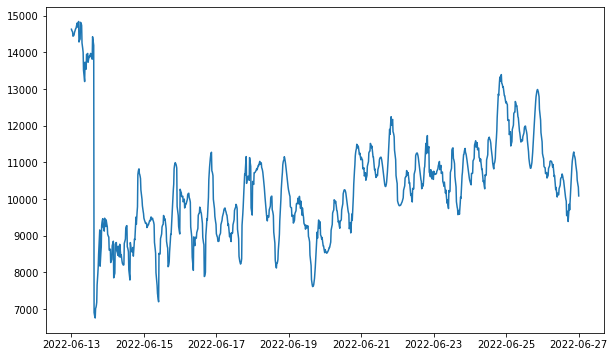

In [19]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])

In [20]:
factual = pd.read_csv('future_actual_load.csv')

In [21]:
factual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-06-14 00:15:00,9000.18
1,1,2022-06-14 00:30:00,8768.38
2,2,2022-06-14 00:45:00,8777.00
3,3,2022-06-14 01:00:00,9093.66
4,4,2022-06-14 01:15:00,9082.27
...,...,...,...
564,564,2022-06-19 22:45:00,7538.72
565,565,2022-06-19 23:00:00,7307.08
566,566,2022-06-19 23:15:00,7204.57
567,567,2022-06-19 23:30:00,7194.45


In [22]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,14629.300400,1433.643629,15689.624745
1,2022-06-13 00:15:00,14596.534634,1398.380395,15586.855900
2,2022-06-13 00:30:00,14574.137081,1382.058811,15588.689046
3,2022-06-13 00:45:00,14561.609787,1449.971097,15637.472163
4,2022-06-13 01:00:00,14439.554249,1424.070351,15404.193074
...,...,...,...,...
1340,2022-06-26 23:00:00,10515.662802,887.659758,11490.649990
1341,2022-06-26 23:15:00,10444.415799,983.321818,11360.593063
1342,2022-06-26 23:30:00,10381.138206,1045.703164,11291.343417
1343,2022-06-26 23:45:00,10327.269919,871.727387,11277.038769


In [23]:
future_predictions.index[future_predictions['ds'] == '2022-06-14 00:15:00']

Int64Index([97], dtype='int64')

In [24]:
future_predictions.index[future_predictions['ds'] == '2022-06-19 23:45:00']

Int64Index([671], dtype='int64')

In [25]:
future_predictions = future_predictions[97:672]

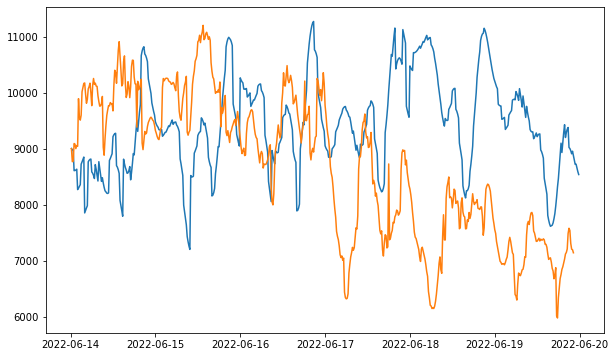

In [26]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])
plt.plot(future_predictions['ds'][:569], factual['Haryana Load (MW)'])